In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the NBA play by play data into a DataFrame
df = pd.read_csv('data/pbp2023.csv')

In [18]:
# Function to calculate points scored by each player in a given game
def points_scored_in_game(game_id):
    # Filter data for the given game_id
    game_df = df[df['gameid'] == game_id]

    # Initialize dictionaries to store points scored by each player
    player_points = {}
    
    # Initialize variables to keep track of running points for home and away teams
    running_h_pts = 0
    running_a_pts = 0
    
    # Iterate through each row in the filtered DataFrame
    for index, row in game_df.iterrows():
        # Get home and away points for the current row
        h_pts = row['h_pts']
        a_pts = row['a_pts']

        if pd.notna(h_pts) and pd.notna(a_pts) and pd.notnull(a_pts) and pd.notnull(h_pts):
            # Calculate points scored by each team in the current row
            points_scored_home = h_pts - running_h_pts
            points_scored_away = a_pts - running_a_pts
            
            # Update running points for home and away teams
            running_h_pts = h_pts
            running_a_pts = a_pts
        
            # Get player name and player id
            player_name = row['player']
            player_id = row['playerid']
            
            # Determine which team scored points
            if points_scored_home > 0:
                points_scored = points_scored_home
            elif points_scored_away > 0:
                points_scored = points_scored_away
            else:
                continue
                
            # Update points scored by the player
            if player_id in player_points:
                player_points[player_id]['points'] += points_scored
            else:
                player_points[player_id] = {'name': player_name, 'points': points_scored}
    return player_points

In [19]:
# Iterate through unique game IDs and calculate points scored by each player for each game
unique_game_ids = df['gameid'].unique()
all_player_points = {}

for game_id in unique_game_ids:
    points_scored = points_scored_in_game(game_id)
    all_player_points[game_id] = points_scored

# Print nicely formatted output
for game_id, player_points in all_player_points.items():
    print("Game ID:", game_id)
    for player_id, data in player_points.items():
        print("Player Name:", data['name'], "| Points Scored:", data['points'])
    print("\n")

Game ID: 22200001
Player Name: M. Smart | Points Scored: 14.0
Player Name: T. Harris | Points Scored: 18.0
Player Name: J. Tatum | Points Scored: 35.0
Player Name: J. Embiid | Points Scored: 26.0
Player Name: J. Harden | Points Scored: 35.0
Player Name: T. Maxey | Points Scored: 21.0
Player Name: G. Williams | Points Scored: 15.0
Player Name: J. Brown | Points Scored: 35.0
Player Name: B. Griffin | Points Scored: 1.0
Player Name: M. Brogdon | Points Scored: 16.0
Player Name: D. House Jr. | Points Scored: 1.0
Player Name: D. Melton | Points Scored: 5.0
Player Name: N. Vonleh | Points Scored: 2.0
Player Name: P. Tucker | Points Scored: 6.0
Player Name: A. Horford | Points Scored: 6.0
Player Name: M. Harrell | Points Scored: 2.0
Player Name: D. White | Points Scored: 2.0
Player Name: G. Niang | Points Scored: 3.0


Game ID: 22200002
Player Name: A. Davis | Points Scored: 27.0
Player Name: K. Thompson | Points Scored: 18.0
Player Name: K. Looney | Points Scored: 7.0
Player Name: S. Curry |

In [13]:
# Function to calculate points scored by a specific player in each game
def points_scored_by_player(player_identifier):
    # Initialize a dictionary to store points scored by the player in each game
    player_points_by_game = {}

    # Initialize variables to keep track of running points for home and away teams
    running_h_pts = 0
    running_a_pts = 0
    
    # Iterate through each row in the filtered DataFrame
    for index, row in df.iterrows():
        # Get home and away points for the current row
        h_pts = row['h_pts']
        a_pts = row['a_pts']

        if pd.notna(h_pts) and pd.notna(a_pts) and pd.notnull(a_pts) and pd.notnull(h_pts):
            # Calculate points scored by each team in the current row
            points_scored_home = h_pts - running_h_pts
            points_scored_away = a_pts - running_a_pts
            
            # Update running points for home and away teams
            running_h_pts = h_pts
            running_a_pts = a_pts
        
            # Get player name and player id
            player_name = row['player']
            player_id = row['playerid']

            if player_identifier in (player_name, player_id):
                # Get game id
                game_id = row['gameid']
            
                # Determine which team scored points
                if points_scored_home > 0:
                    points_scored = points_scored_home
                elif points_scored_away > 0:
                    points_scored = points_scored_away
                else:
                    continue
                
                # Update points scored by the player in the corresponding game
                if game_id in player_points_by_game:
                    player_points_by_game[game_id] += points_scored
                else:
                    player_points_by_game[game_id] = points_scored
            
    # Print the points scored by the player in each game
    for game_id, points_scored in player_points_by_game.items():
        print("Game ID:", game_id, "| Points Scored by", player_identifier, ":", points_scored)

    return player_points_by_game


Game ID: 22200001 | Points Scored by J. Brown : 35.0
Game ID: 22200022 | Points Scored by J. Brown : 28.0
Game ID: 22200030 | Points Scored by J. Brown : 12.0
Game ID: 22200047 | Points Scored by J. Brown : 21.0
Game ID: 22200072 | Points Scored by J. Brown : 32.0
Game ID: 22200089 | Points Scored by J. Brown : 24.0
Game ID: 22200107 | Points Scored by J. Brown : 30.0
Game ID: 22200124 | Points Scored by J. Brown : 16.0
Game ID: 22200135 | Points Scored by J. Brown : 30.0
Game ID: 22200152 | Points Scored by J. Brown : 21.0
Game ID: 22200163 | Points Scored by J. Brown : 30.0
Game ID: 22200176 | Points Scored by J. Brown : 25.0
Game ID: 22200201 | Points Scored by J. Brown : 26.0
Game ID: 22200214 | Points Scored by J. Brown : 22.0
Game ID: 22200231 | Points Scored by J. Brown : 27.0
Game ID: 22200250 | Points Scored by J. Brown : 25.0
Game ID: 22200264 | Points Scored by J. Brown : 31.0
Game ID: 22200275 | Points Scored by J. Brown : 25.0
Game ID: 22200294 | Points Scored by J. Brown 

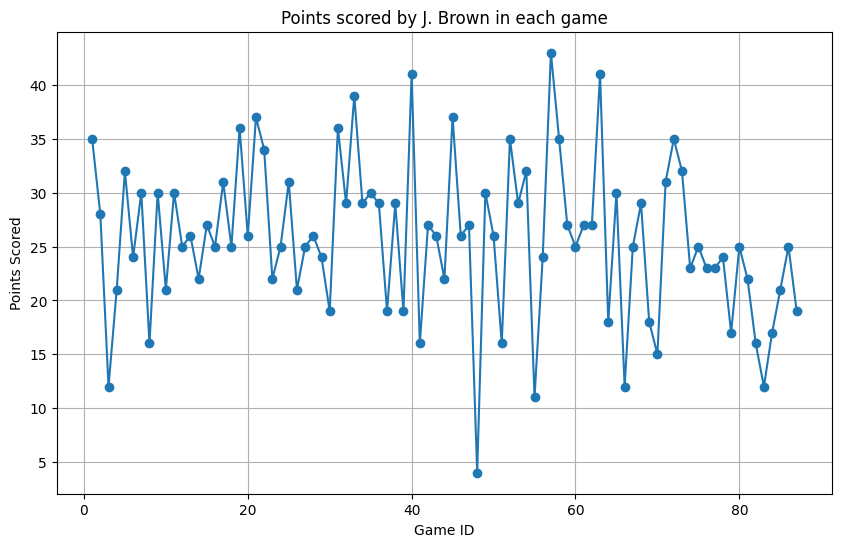

In [17]:
# Example usage:
# Specify the player's name or ID as input
player_identifier = 'J. Brown'
player_points_by_game = points_scored_by_player(player_identifier)
extracted = player_points_by_game.items()

# Extract game ids and points scored for plotting
game_ids = list(player_points_by_game.keys())
game_indices = range(1, len(game_ids) + 1)  # Using numerical indices starting from 1
points = list(player_points_by_game.values())

# Plot points scored by the player in each game
plt.figure(figsize=(10, 6))
plt.plot(game_indices, points, marker='o', linestyle='-')
plt.title('Points scored by ' + player_identifier + ' in each game')
plt.xlabel('Game ID')
plt.ylabel('Points Scored')
plt.grid(True)
plt.show()